In [ ]:
!pip install livelossplot==0.5.3
!pip install tensorflow==2.3

In [ ]:
# import all the dependencies
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
from google.colab import drive
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from keras.callbacks import CSVLogger
from livelossplot import PlotLossesKeras

In [ ]:
# mount the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# input the pickle with the training data (features and labels)
pickle_in = open("/content/drive/MyDrive/project_3/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_out = open("/content/drive/MyDrive/project_3/y.pickle","rb")
y = pickle.load(pickle_out)

In [ ]:
print(X.shape)

(95971, 64, 64, 3)


In [ ]:
#convert into an array

y = np.array(y)

In [ ]:
print(y.shape)

(95971,)


In [ ]:
print(len(y))

95971


In [ ]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape)

(76776, 64, 64, 3)


In [ ]:
# convert into float

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255



In [ ]:

# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(32, (3,3), strides=(1,1), padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())

# convolutional layer
model.add(Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(1024, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# output layer
model.add(Dense(101, activation='softmax'))

In [ ]:
# compile the sequential model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       7

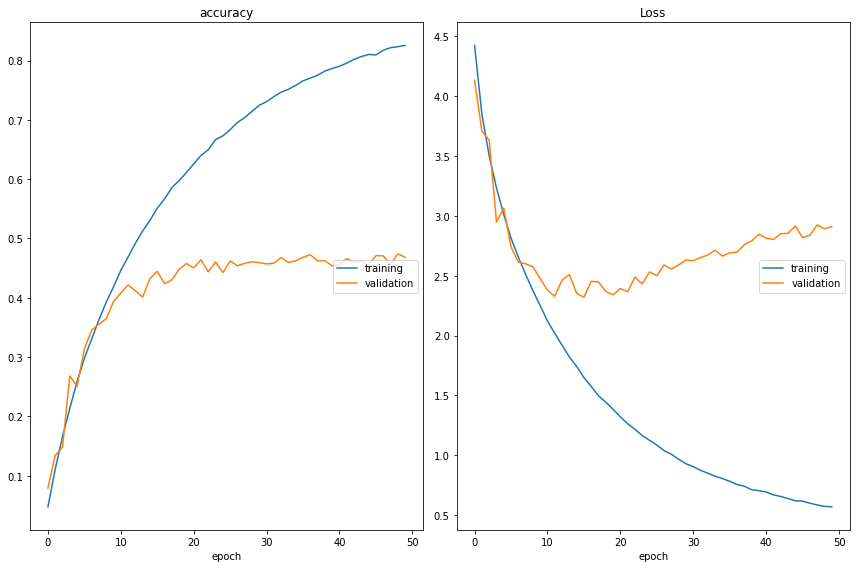

accuracy
	training         	 (min:    0.048, max:    0.825, cur:    0.825)
	validation       	 (min:    0.079, max:    0.474, cur:    0.468)
Loss
	training         	 (min:    0.570, max:    4.424, cur:    0.570)
	validation       	 (min:    2.320, max:    4.131, cur:    2.910)
1920/1920 [==============================] - 63s 33ms/step - loss: 0.5701 - accuracy: 0.8254 - val_loss: 2.9099 - val_accuracy: 0.4684


In [ ]:
# fit the model and plotting the accuracy and loss
model.fit(X_train, y_train, 
         batch_size=32, 
         epochs=50,
         validation_split=0.20,
         callbacks=[PlotLossesKeras()])

In [ ]:
# Save the model
model.save("/content/drive/MyDrive/project_3/food_seq_model.h5")

In [ ]:
# display model loass anra
model_loss, model_accuracy = model.evaluate(
    X_test, y_test, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

600/600 - 5s - loss: 2.9635 - accuracy: 0.4642
Normal Neural Network - Loss: 2.9634642601013184, Accuracy: 0.46423548460006714
